# **Traffic Sign Recognition** 

## Writeup


---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

[//]: # (Image References)

## Rubric Points
### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  


---
### Writeup / README

#### 1. Provide a Writeup / README that includes all the rubric points and how you addressed each one. You can submit your writeup as markdown or pdf. You can use this template as a guide for writing the report. The submission includes the project code.

You're reading it! and here is a link to my [project code]()

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used the numpy library to calculate summary statistics of the traffic
signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32,32,3)
* The number of unique classes/labels in the data set is 43

#### 2. Include an exploratory visualization of the dataset.

Here is an exploratory visualization of the data set(train set + valid set + test set). It is a bar chart showing how the data is composed.

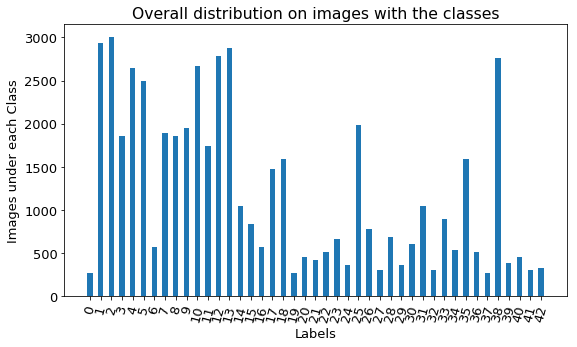

Some Traffic signs in train set are like this:
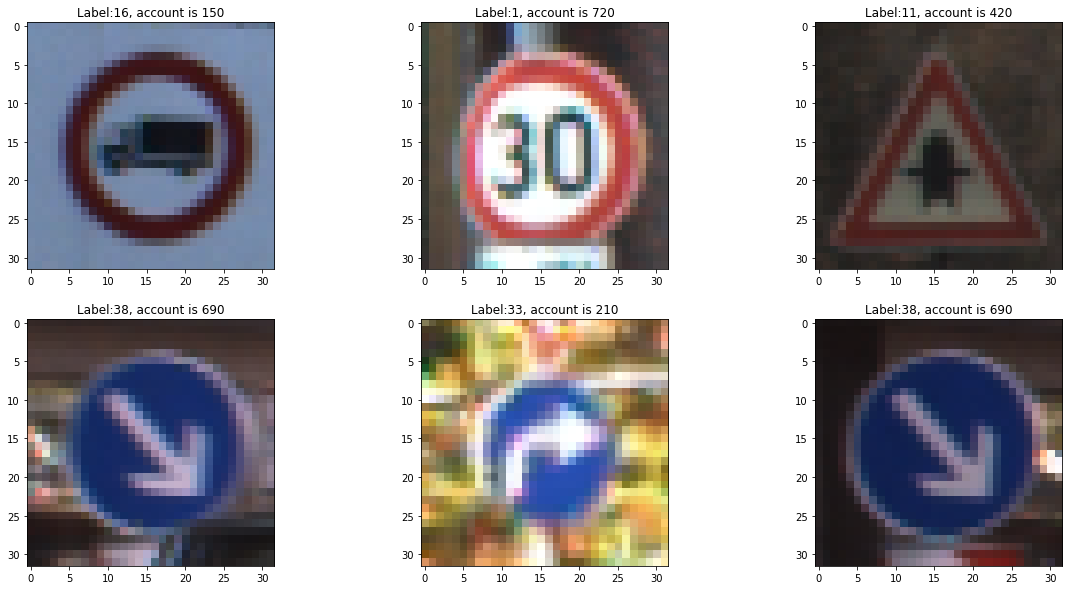

### Design and Test a Model Architecture

#### 1. image data preprocess 

Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

(OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)

As a first step, I decided to convert the images to grayscale with Mean Value Method，because in the process of traffic sign recognition, color is not the main feature. And pictures with single channel makes iterate faster. 
Here is an example of a traffic sign image before and after grayscaling.

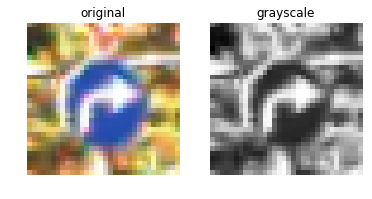

Then I normalized the image data because after normalizing and processing the input features to a similar range, it would be easier and faster to optimize the cost function. In this project I normalized the training and test sets to the (-1,1) range.

After that I decided to generate additional data because the more sufficient training data you have, the more accurate the model could be.

To add more data to the the data set, I used Multi-dimensional image processing libray (numpy.ndimage) to generate a larger dataset for the model. Firstly I expanded the given dataset for 5 times, then rotated the original images with random angles within(-20,20), then shifted images with random distance(-2,2).During the dimensional image processing edges of image were filled with given background values(median of the image).

Here is an example of an original image and an augmented image:

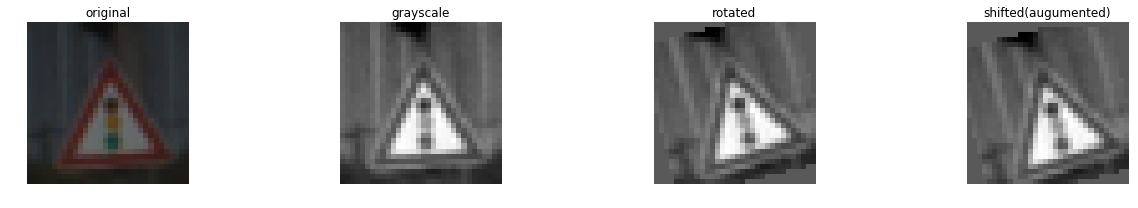

The difference between the original data set and the augmented data set is the following:

    - shape of the augmented data set is agument_x.shape:  (173995, 32, 32, 1)
    - labels in augmented data set: agument_y.shape:  (173995,)
        agument_x mean: -0.35872751451917845
        agument_y mean: 15.738297077502228
    - augmented image has 1 chanel with size of (32, 32, 1), while  original image has 3 chanels with size of (32, 32, 3).



As a last step, I splited the augmented data set into training and validation sets and shuffled.(20% as validation set). Data set becomes:

    Number of training examples = (139196, 32, 32, 1)
    Number of validation examples = (34799, 32, 32, 1)
    Image data shape = (32, 32, 1)
    Number of classes = 43

#### 2. The final model architecture 

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   				    | 
| Convolution 3x3     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
| Convolution 3x3	    | 1x1 stride,  valid padding, outputs 10x10x16  |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x16 				    |
| Flatten				| Output = 400									|
| Fully connected		| Input = 400, Output = 120       				|
| RELU					|												|
| Fully connected		| Input = 120, Output = 84      				|
| RELU					|												|
| Fully connected		| Input = 84, Output = 43       				|


 

#### 3. How I trained my model. 

To train the model, I used hyperparameters like:
* EPOCHS = 15
* BATCH_SIZE = 130
* rate = 0.001

Then I used tf.nn.softmax_cross_entropy_with_logits to calculate the cross_entropy, and took the AdamOptimizer as optimizer.

```
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

```

#### 4. Approachs taken for finding a solution 


My final model results were:
* training set accuracy of 0.998
* validation set accuracy of 0.979
* test set accuracy of 0.921

The trained model was saved at './model_15_epoch/lenet'.

I used LeNet as the basic architecture(function LeNet() in my code). Comparing to basic architecture the input size of input layer was addapted in to (32,32,1), because I'd like to directly use grayscal images as Input. And Output dimesion was adhusted to 43 coresponding to the whole traffic sign types.

In tunning part I used parameter adopping to get a preciser prediction result. I've tried different EPOCH times like 10,15,20. Only to find too many EPOCH times did't contribute much to the accurany and may even led an overfitting. So the final trained model was the result of 15 EPOCH times. 

### Test a Model on New Images

#### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are ten German traffic signs that I found on the web:

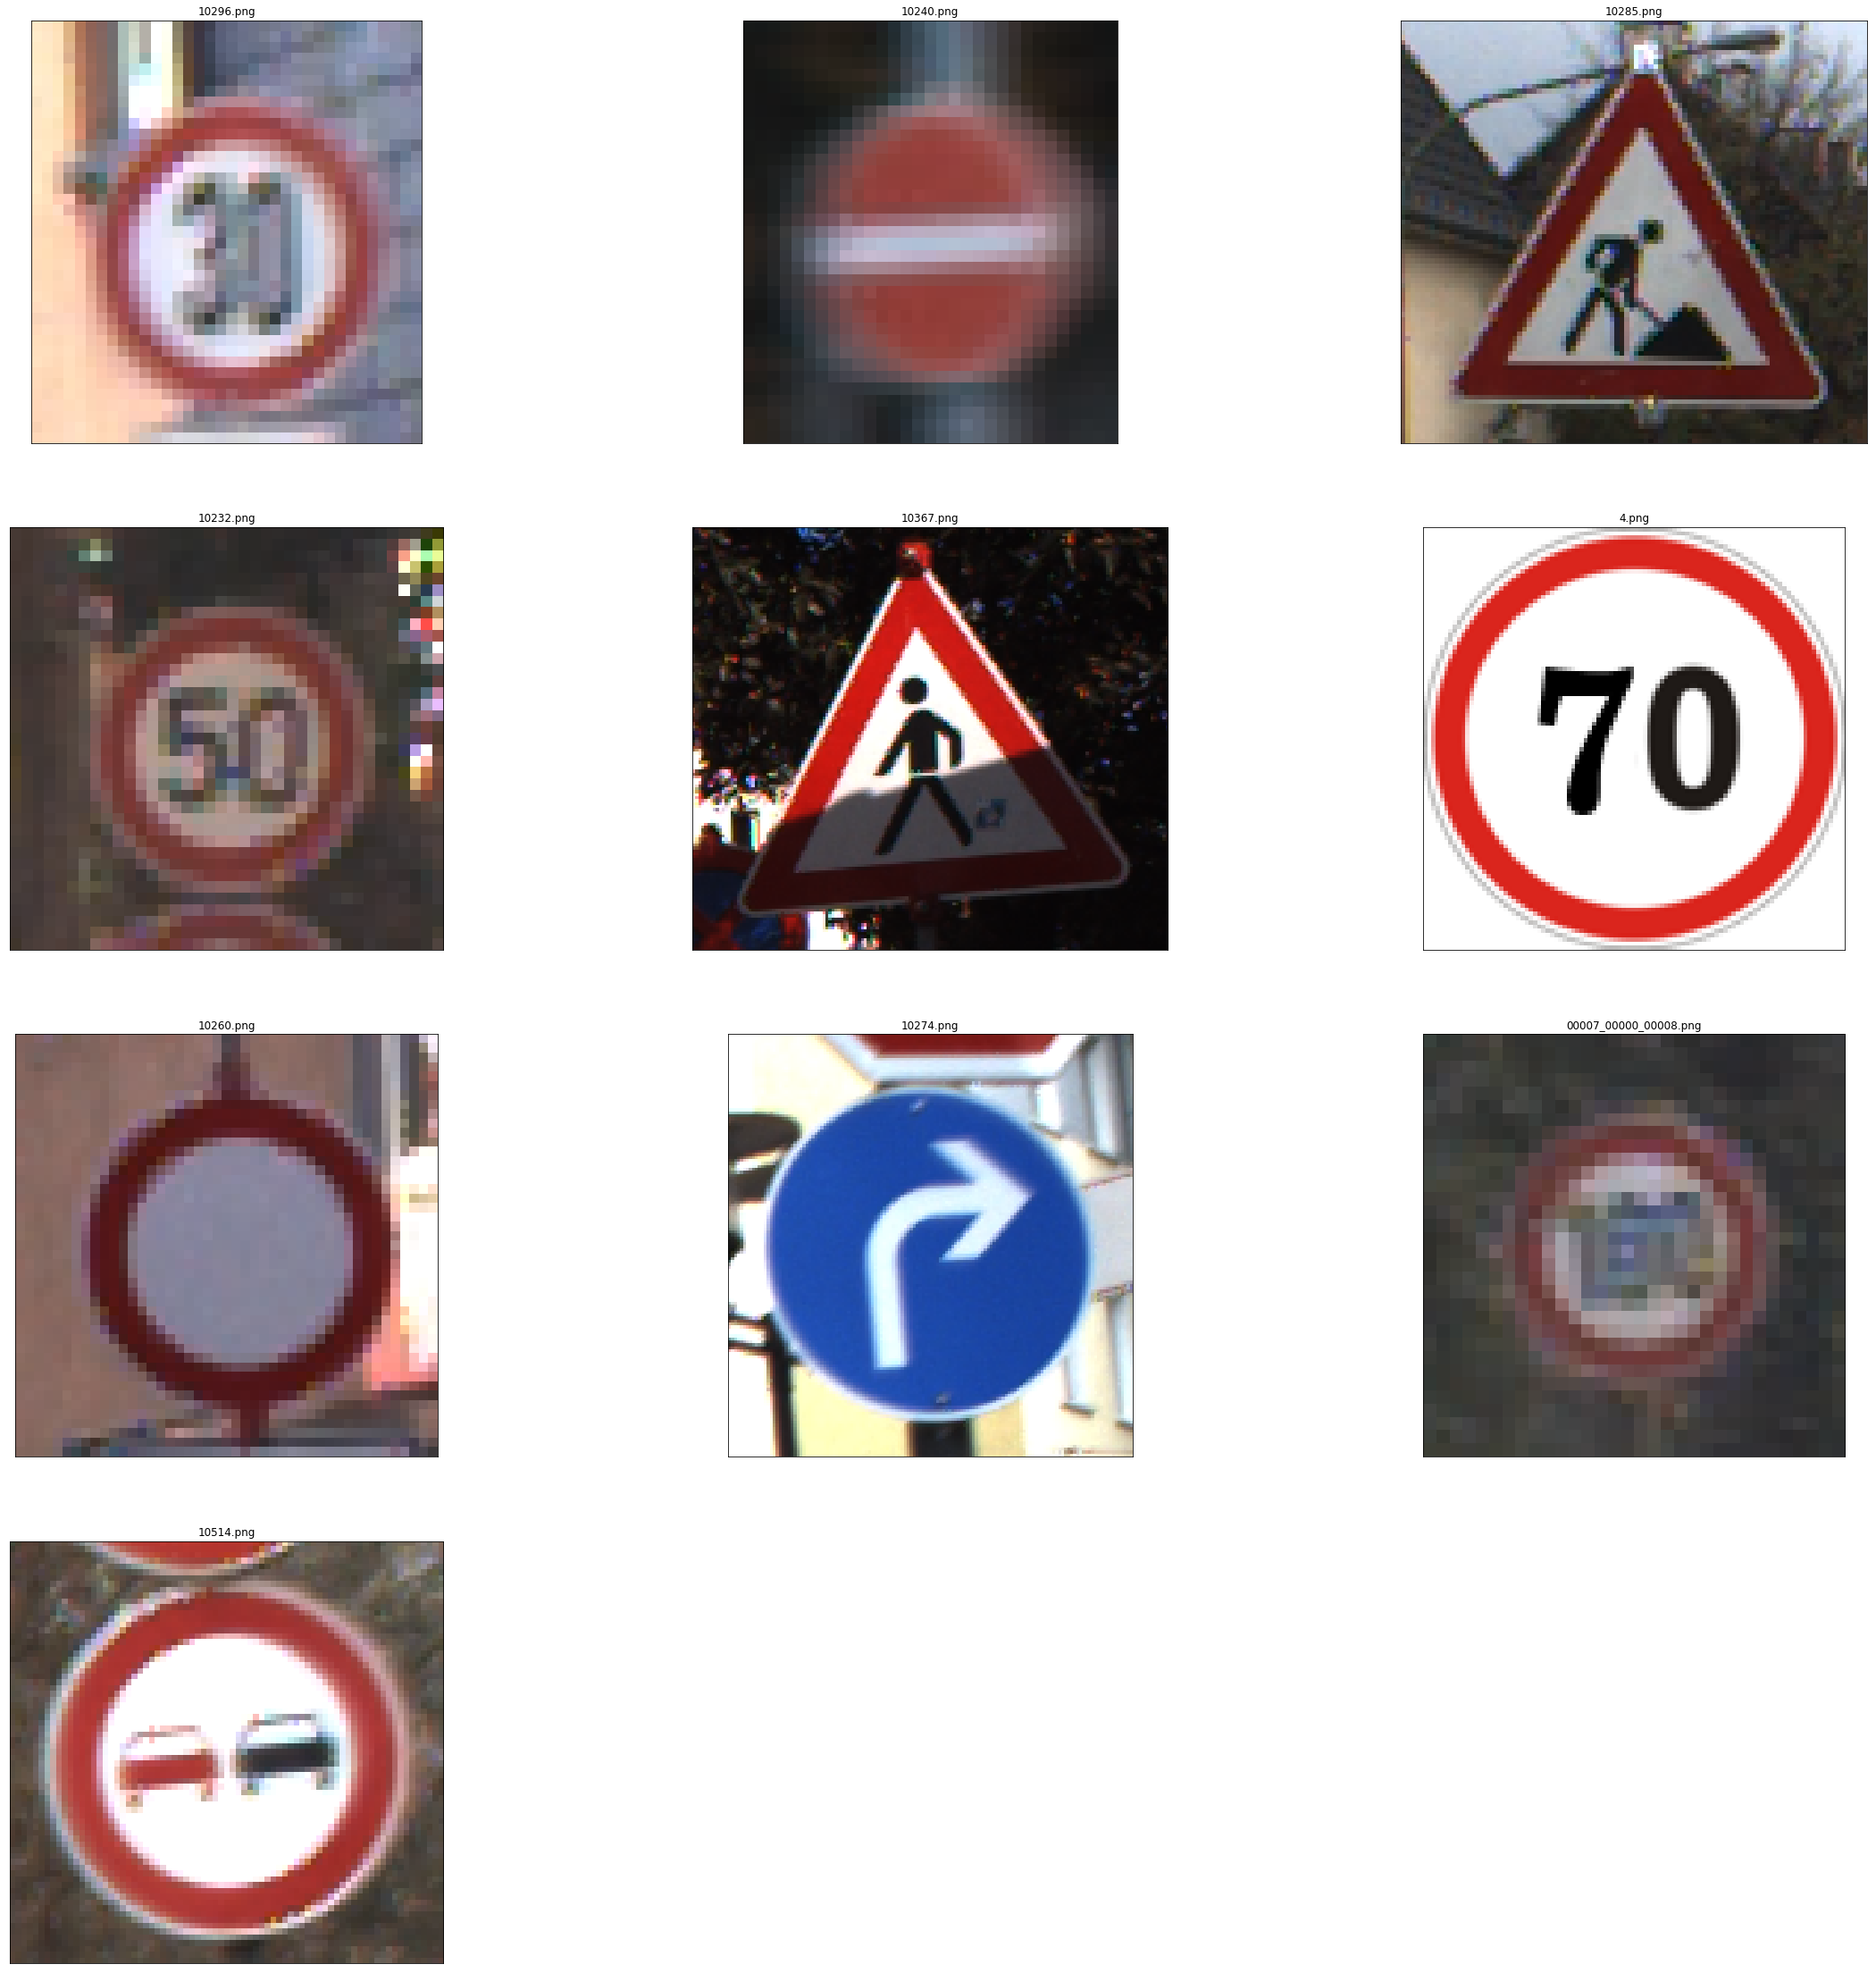

The image "00007_00000_00008.png" might be difficult to classify because quality of the image is rather low. Besides, size of these images are different with each other and mostly are not (32,32). So I used function from PIL libary to resize and then preprogress them to a proper status for Lenet Model.


#### 2. Model's predictions on these new traffic signs

Here are the results of the prediction, I used color on the label to demonstrate the result (red means wrong, green means correct):

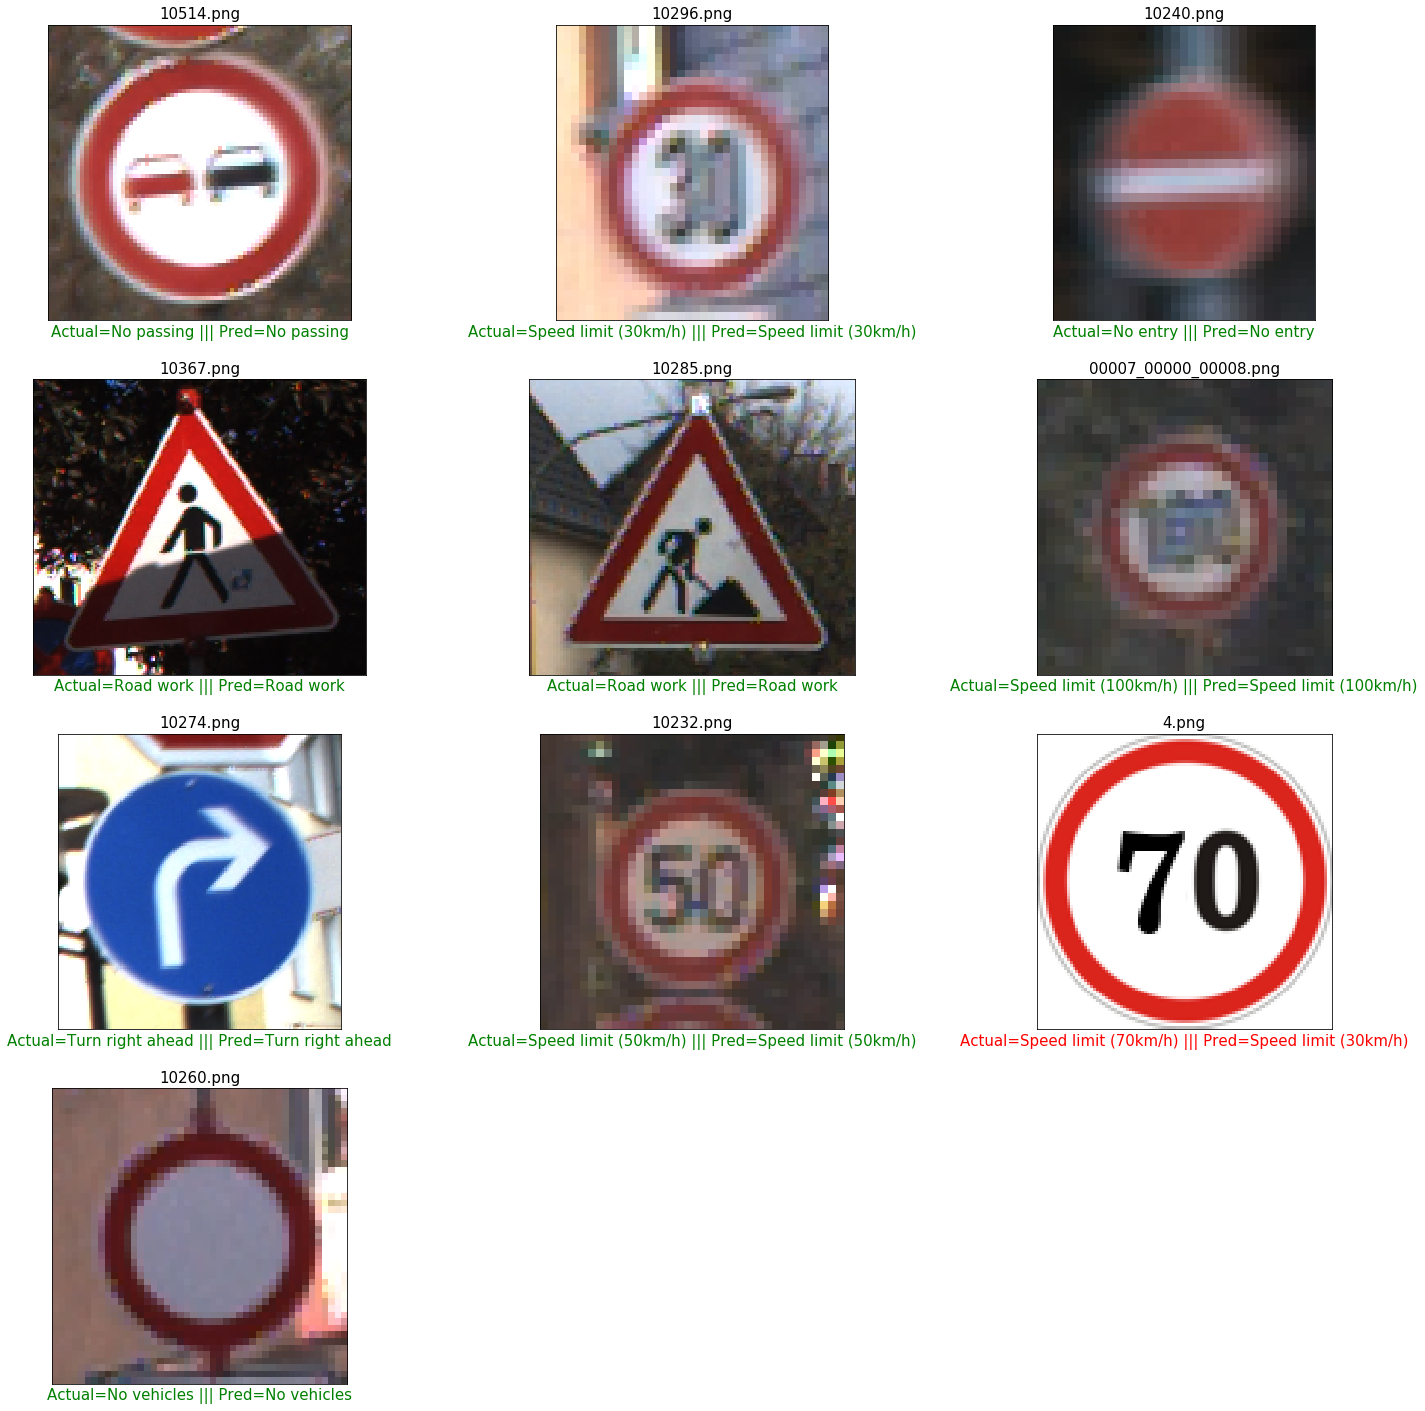

| Image			              |     Prediction	        					  | 
|:---------------------------:|:---------------------------------------------:| 
| No passing                  | No passing         							  |
| Speed limit (30km/h)        | Speed limit (30km/h)						  |
| No entry                    | No entry                     			      |
| Road work                   | Road work                     			      |
| Speed limit (100km/h)       | Speed limit (100km/h)    					  |
| Turn right ahead            | Turn right ahead 							  | 
| Speed limit (50km/h)        | Speed limit (50km/h)		    			  |
| Speed limit (70km/h)        | Speed limit (30km/h)						  |
| No vehicles                 | No vehicles   								  |



The model was able to correctly guess 9 of the 10 traffic signs, which gives an accuracy of 90%. This compares favorably to the accuracy on the test set of 0.921.


#### 3.  Top 5 softmax probabilities analyse

The code for making predictions on my final model is located in the 33th cell of the Ipython notebook.

For the first image, the model is pretty sure that this is a No passing  (probability of 1.0), and the image does contain a No passing sign. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00        			| No passing 									| 
| 0.00     				| No passing for vehicles over 3.5 metric tons	|
| 0.00					| Vehicles over 3.5 metric tons prohibited									|
| 0.00	      			| End of no passing				 				|
| 0.00				    | Speed limit (60km/h)     							|


For the second image, the model is also pretty sure that this is a Speed limit (30km/h) sign (almost 100 persent sure). The top five soft max probabilities were:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 1.00        			| Speed limit (30km/h)									| 
| 0.00     				| Speed limit (20km/h)|
| 0.00					| Roundabout mandatory								|
| 0.00	      			| Priority road		 				|
| 0.00				    | Speed limit (70km/h)    							|

Same certainty also goes by the third, fourth, fifth, 6th, 7th and 10th image.

For the 8th image, the certainty is not 100% percent but still rather solid. The top five soft max probabilities were:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.999981     			| Speed limit (50km/h)									| 
| 0.000019 				| Speed limit (30km/h)|
| 0.00					| Speed limit (80km/h)								|
| 0.00	      			| Speed limit (100km/h)	 				|
| 0.00				    | Speed limit (60km/h)    							|

But for the 9th image,the model is not so sure what this traffic sign is.And this is the right image that model prediction goes wrong. Top five soft max probabilities were:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 0.664297         		| Speed limit (30km/h)  									| 
| 0.306516  			| Ahead only										|
| 0.029186  			| Roundabout mandatory										|
| 0.000000	      		| Go straight or left					 				|
| 0.000000			    | Speed limit (100km/h)   							|

### (Optional) Visualizing the Neural Network (See Step 4 of the Ipython notebook for more details)
#### 1. Discuss the visual output of your trained network's feature maps. What characteristics did the neural network use to make classifications?